In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Read the clean csv file 
df = pd.read_csv('/Users/shauna/Desktop/Wifinder/WiFinder/Data/final_csvs/merged_table.csv')
df.head()

,Associated_count,Time,Room_Capacity,Module,Registered_Students,Hour,Date,Room,Occupancy
0,2,09:02:20,90,Vacant,-1.0,9,2015-11-03,B002,0.0
1,1,09:07:24,90,Vacant,-1.0,9,2015-11-03,B002,0.0
2,0,09:12:01,90,Vacant,-1.0,9,2015-11-03,B002,0.0
3,0,09:16:53,90,Vacant,-1.0,9,2015-11-03,B002,0.0
4,1,09:21:55,90,Vacant,-1.0,9,2015-11-03,B002,0.0


In [3]:
# Descriptive stats for numeric features
df.describe().T

/Users/shauna/anaconda/lib/python3.5/site-packages/numpy/lib/function_base.py:3823: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,count,mean,std,min,25%,50%,75%,max
Associated_count,2502.0,30.284972,28.965944,0.0,10.0,22.00,42.00,232.0
Room_Capacity,2502.0,133.333333,61.294838,90.0,90.0,90.00,220.00,220.0
Registered_Students,2444.0,39.391980,41.053415,-1.0,NaN,NaN,NaN,143.0
Hour,2502.0,12.525180,2.298924,9.0,11.0,13.00,15.00,16.0
Occupancy,2502.0,0.249101,0.217957,0.0,0.0,0.25,0.25,1.0


In [4]:
# Check for missing data
df.isnull().sum()

Associated_count        0
Time                    0
Room_Capacity           0
Module                  0
Registered_Students    58
Hour                    0
Date                    0
Room                    0
Occupancy               0
dtype: int64

# What will we do with nan / vacant?
For now I will replace them with -1 and we can talk about removing them if they become an issue?

In [35]:
# Replace alll NaN values with the mean
df['Registered_Students']  = df['Registered_Students'].fillna(-1)

In [36]:
#check it worked
df.isnull().sum()

Associated_count       0
Time                   0
Room_Capacity          0
Module                 0
Registered_Students    0
Hour                   0
Date                   0
Room                   0
Occupancy              0
dtype: int64

In [7]:
# Check data types
df.dtypes

Associated_count         int64
Time                    object
Room_Capacity            int64
Module                  object
Registered_Students    float64
Hour                     int64
Date                    object
Room                    object
Occupancy              float64
dtype: object

In [8]:
# Select all the object features
object = df.select_dtypes(['object']).columns
# Tranform all the object features into categorical features
for column in object:
    df[column] = df[column].astype('category')

In [11]:
#change hour to categorical
df['Hour'] = df['Hour'].astype('category')

In [12]:
# Check if the change went correctly
df.dtypes

Associated_count          int64
Time                   category
Room_Capacity             int64
Module                 category
Registered_Students     float64
Hour                   category
Date                   category
Room                   category
Occupancy               float64
dtype: object

# Left Occupancy as float as not sure if we are changing to categorical at this point

In [14]:
# Descriptive stats for categorical features
df.select_dtypes(['category']).describe().T

,count,unique,top,freq
Time,2502,828,10:28:09,6
Module,2502,41,Vacant,651
Hour,2502,8,16,321
Date,2502,9,2015-11-13,282
Room,2502,3,B004,834


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1159bc4a8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11819cb00>]], dtype=object)

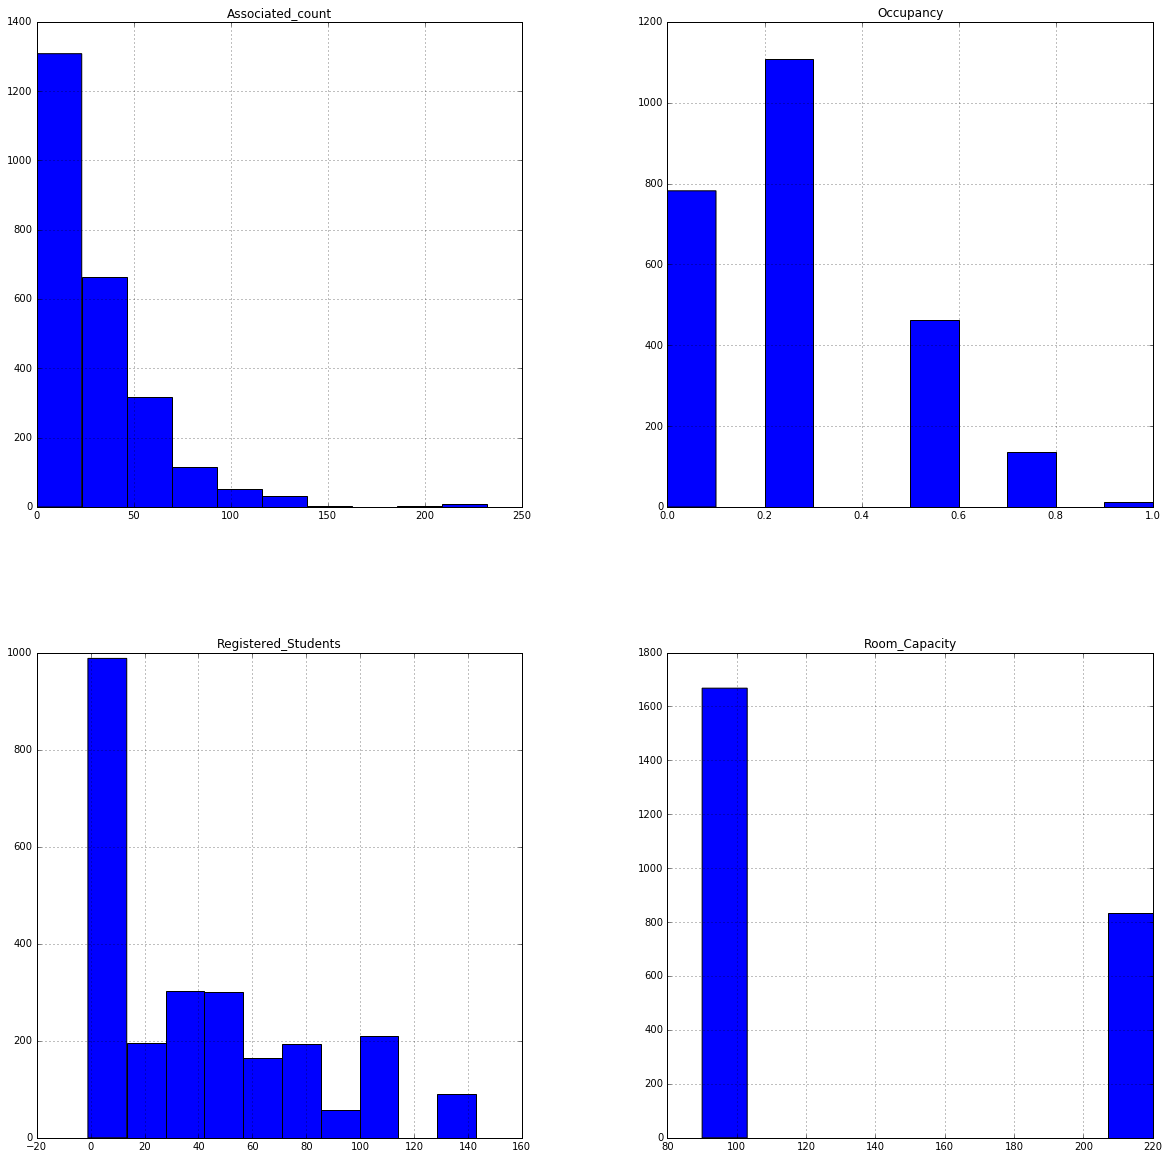

In [15]:
# Descriptive stats for numeric features
%matplotlib inline
plt.figure()
df.hist(figsize=(20, 20))
#plt.savefig('DataQualityReport-NumericFeatures-Histograms.png')

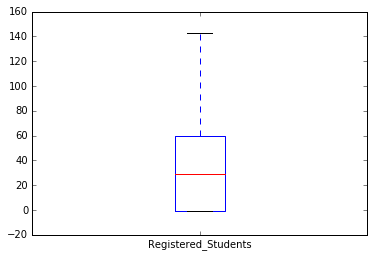

In [16]:
# Plot the correlation between ? and all the continuous variables
df['Registered_Students'].plot(kind='box')

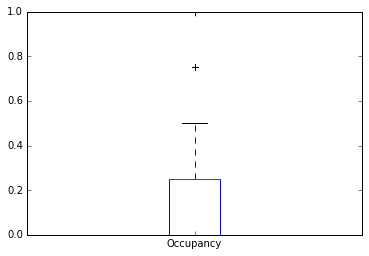

In [17]:
df['Occupancy'].plot(kind='box')

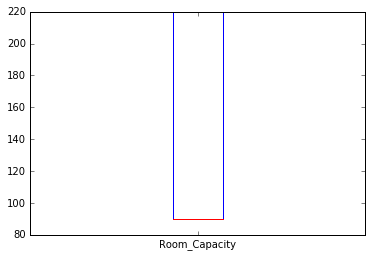

In [18]:
df['Room_Capacity'].plot(kind='box')

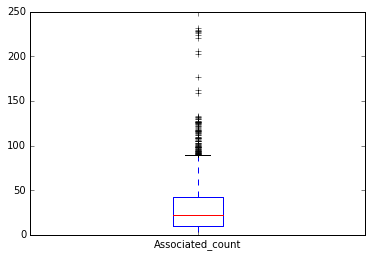

In [19]:
df['Associated_count'].plot(kind='box')

In [ ]:
# plt.figure(figsize=(10,10))
# df['Time'].value_counts().plot(kind='bar')

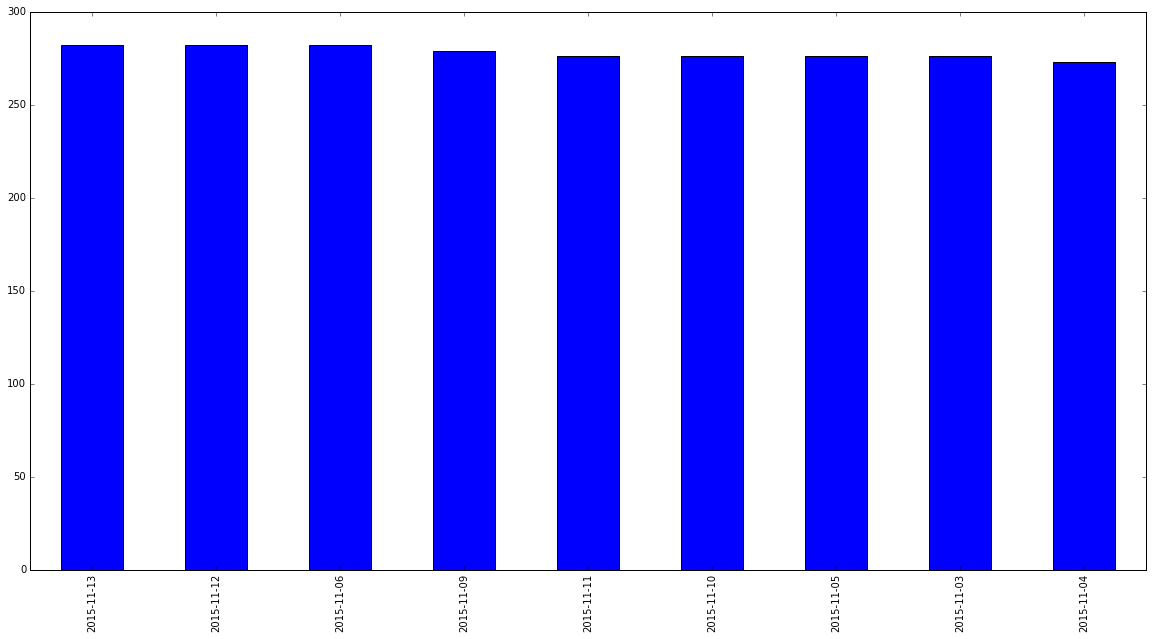

In [22]:
plt.figure(figsize=(20,10))
df['Date'].value_counts().plot(kind='bar')

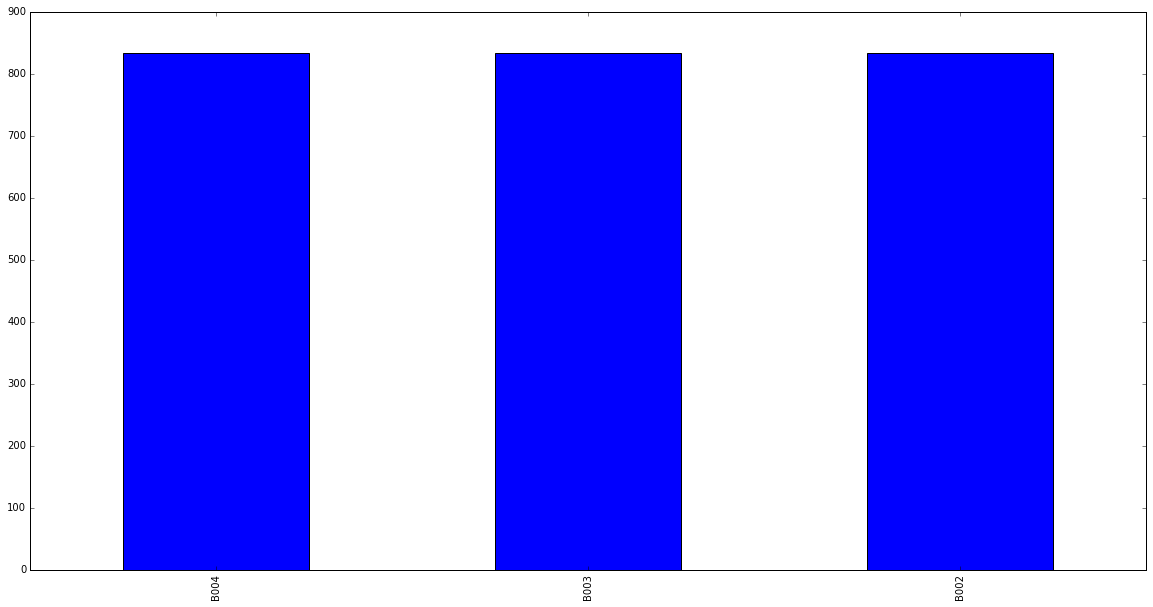

In [21]:
plt.figure(figsize=(20,10))
df['Room'].value_counts().plot(kind='bar')

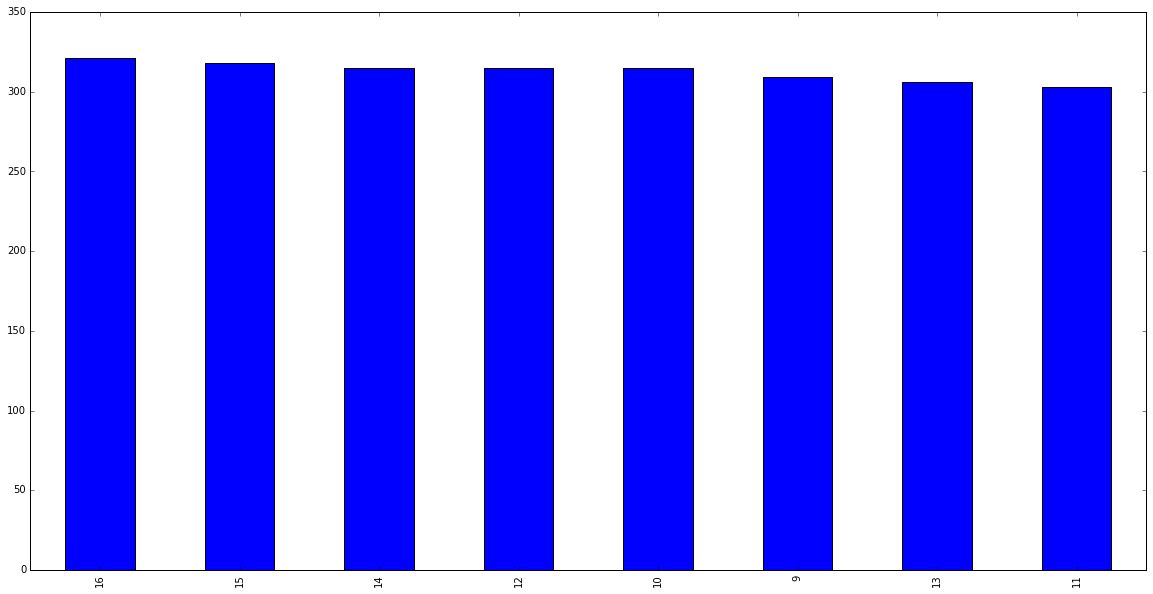

In [20]:
plt.figure(figsize=(20,10))
df['Hour'].value_counts().plot(kind='bar')

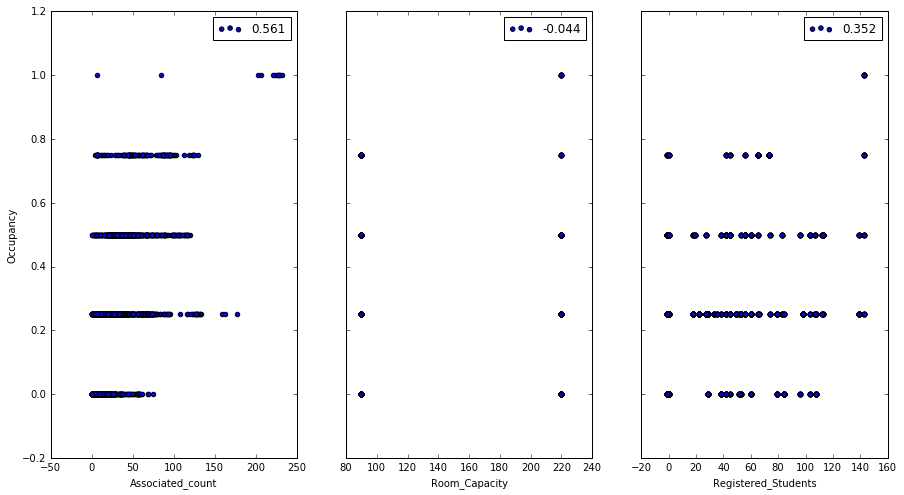

In [24]:
# scatterplots for all continuous features and the target feature total_score
fig, axs = plt.subplots(1, 3, sharey=True)
df.plot(kind='scatter',x='Associated_count',  y='Occupancy',  label="%.3f" % df[['Associated_count','Occupancy' ]].corr().as_matrix()[0,1], ax=axs[0], figsize=(15, 8))
df.plot(kind='scatter',x='Room_Capacity', y='Occupancy',  label="%.3f" % df[['Room_Capacity', 'Occupancy']].corr().as_matrix()[0,1], ax=axs[1])
df.plot(kind='scatter',x='Registered_Students',  y='Occupancy', label="%.3f" % df[['Registered_Students','Occupancy']].corr().as_matrix()[0,1], ax=axs[2])

In [25]:
# print the correlations among all the continuous features.
df[['Occupancy','Associated_count', 'Room_Capacity','Registered_Students']].corr()

,Occupancy,Associated_count,Room_Capacity,Registered_Students
Occupancy,1.000000,0.561168,-0.043771,0.351529
Associated_count,0.561168,1.000000,0.307442,0.676413
Room_Capacity,-0.043771,0.307442,1.000000,0.478024
Registered_Students,0.351529,0.676413,0.478024,1.000000


      Occupancy
Room           
B002     187.25
B003     239.50
B004     196.50


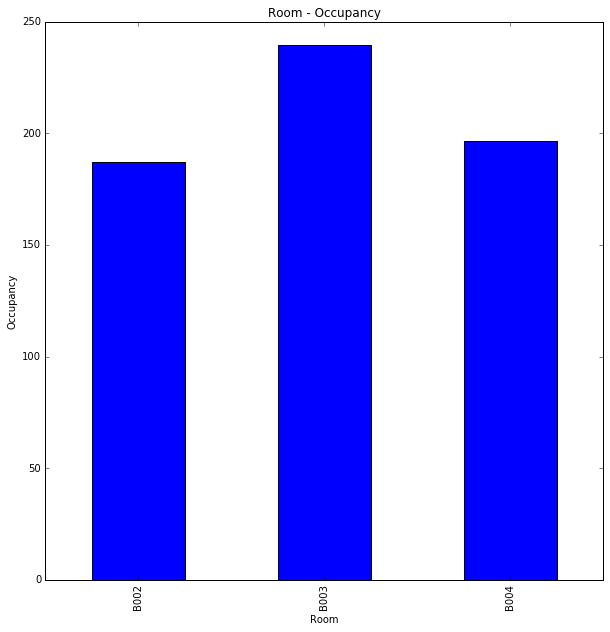

In [33]:
# print Occupancy for all rooms (also to check there are no  more NaN values)
roomGroup=df.loc[:,['Occupancy', 'Room']]
roomGroup=roomGroup.groupby(['Room']).sum()
print(roomGroup)
# barplot for Room - Occupancy
room_plot = roomGroup.plot(kind='bar',title="Room - Occupancy",figsize=(10, 10),legend=None)
room_plot.set_xlabel("Room")
room_plot.set_ylabel("Occupancy")

      Occupancy
Hour           
9         57.50
10        77.75
11        87.00
12       104.50
13        67.00
14       101.50
15        80.25
16        47.75


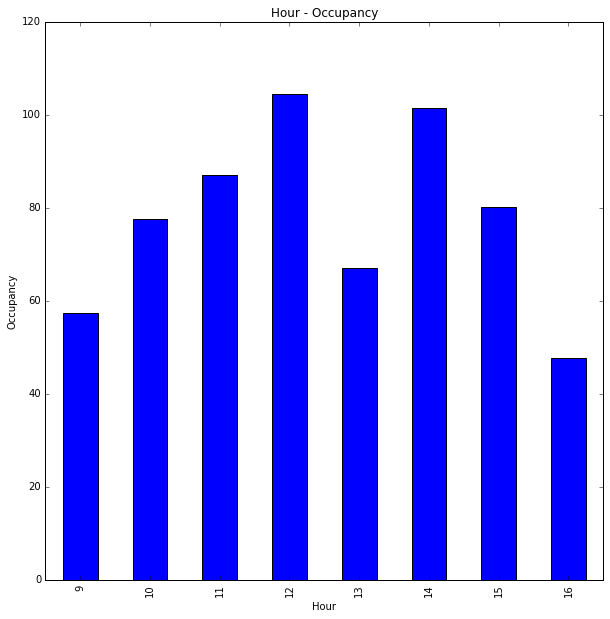

In [32]:
# print Occupancy for all rooms (also to check there are no  more NaN values)
hourGroup=df.loc[:,['Occupancy', 'Hour']]
hourGroup=hourGroup.groupby(['Hour']).sum()
print(hourGroup)
# barplot for Room - Occupancy
hour_plot = hourGroup.plot(kind='bar',title="Hour - Occupancy",figsize=(10, 10),legend=None)
hour_plot.set_xlabel("Hour")
hour_plot.set_ylabel("Occupancy")

            Occupancy
Date                 
2015-11-03      96.25
2015-11-04      51.00
2015-11-05      68.75
2015-11-06      85.50
2015-11-09      78.50
2015-11-10      65.75
2015-11-11      62.50
2015-11-12      64.75
2015-11-13      50.25


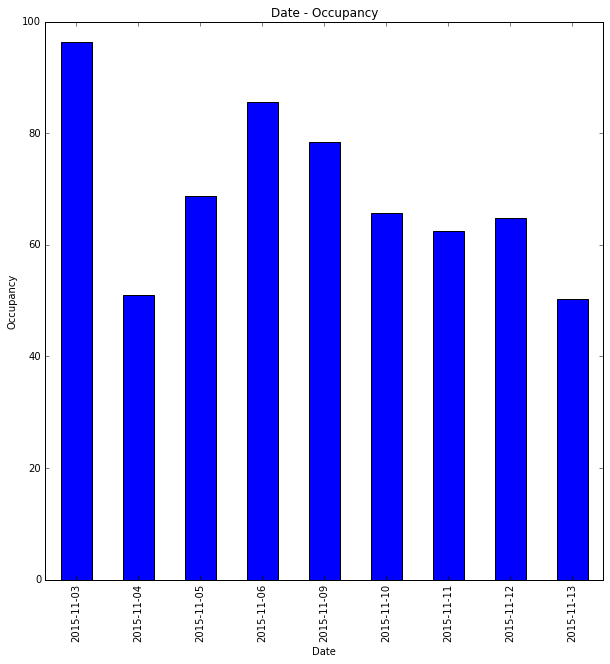

In [31]:
# print Occupancy for all dates (also to check there are no  more NaN values)
dateGroup=df.loc[:,['Occupancy', 'Date']]
dateGroup=dateGroup.groupby(['Date']).sum()
print(dateGroup)
# barplot for Room - Occupancy
date_plot = dateGroup.plot(kind='bar',title="Date - Occupancy",figsize=(10, 10),legend=None)
date_plot.set_xlabel("Date")
date_plot.set_ylabel("Occupancy")

          Occupancy
Time               
09:00:25       0.50
09:01:03       0.25
09:02:00       0.50
09:02:06       0.50
09:02:10       1.00
09:02:20       0.75
09:03:44       1.00
09:03:59       0.25
09:04:34       0.25
09:05:30       0.50
09:06:03       0.25
09:06:51       0.50
09:07:06       1.00
09:07:24       1.25
09:08:34       1.00
09:09:19       0.25
09:09:29       0.25
09:10:05       0.50
09:10:52       0.25
09:11:40       0.50
09:11:55       1.00
09:12:01       0.75
09:12:06       0.50
09:13:32       1.00
09:13:34       0.25
09:14:24       0.25
09:14:42       0.50
09:15:52       0.25
09:16:35       0.50
09:16:45       1.00
...             ...
16:42:10       0.75
16:42:22       0.50
16:42:25       0.25
16:45:04       0.25
16:45:28       0.00
16:45:45       0.25
16:46:28       1.00
16:46:48       0.75
16:47:07       0.25
16:47:19       0.75
16:47:28       0.50
16:47:38       0.25
16:49:12       0.25
16:50:30       0.00
16:50:59       0.25
16:51:28       1.00
16:51:58       0.75


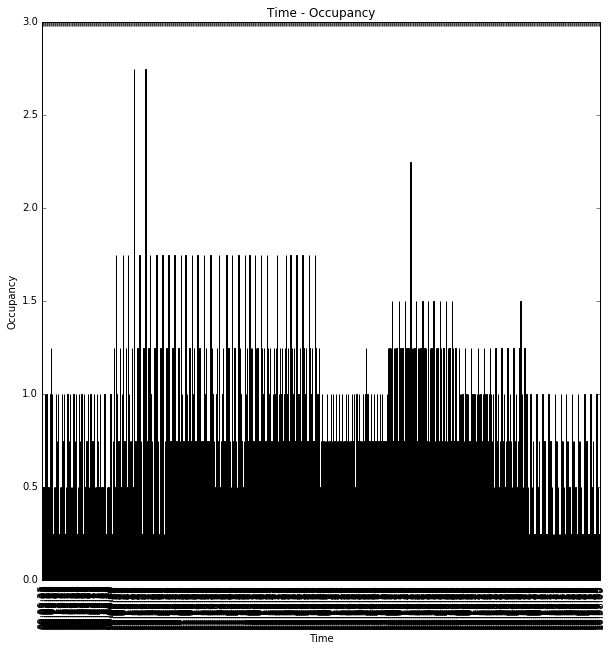

In [34]:
# print Occupancy for all dates (also to check there are no  more NaN values)
timeGroup=df.loc[:,['Occupancy', 'Time']]
timeGroup=timeGroup.groupby(['Time']).sum()
print(timeGroup)
# barplot for Room - Occupancy
time_plot = timeGroup.plot(kind='bar',title="Time - Occupancy",figsize=(10, 10),legend=None)
time_plot.set_xlabel("Time")
time_plot.set_ylabel("Occupancy")